In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forbes-billionaires-of-2021/Billionaire.csv


In [2]:
df=pd.read_csv('/kaggle/input/forbes-billionaires-of-2021/Billionaire.csv')
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [3]:
df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [4]:
df=df.dropna()
df.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [5]:
len(df[df['Country']=='India'])*100/len(df)

5.007473841554559

In [6]:
freq=[]
for country in df['Country'].unique():
    
    freq.append([country,len(df[df['Country']==country])*100/len(df)])
freq=pd.DataFrame(freq,columns=['Country','%Freq'])
freq.sort_values(by='%Freq',ascending=False).head()

,Country,%Freq
0,United States,26.905830
4,China,22.795217
2,India,5.007474
11,Russia,4.409567
8,Germany,4.297459


In [7]:
net_worth=[]
for i in df['NetWorth']:
    net_worth.append(int(float(i[1:-2])))
df['NetWorth']=net_worth

# 1)Top 10 Billionaires of India 

In [8]:
df[df['Country']=="India"].sort_values(by='NetWorth',ascending=False)['Name'].head(10)

9              Mukesh Ambani
23     Gautam Adani & family
71                Shiv Nadar
116       Radhakishan Damani
122               Uday Kotak
133           Lakshmi Mittal
167              Kumar Birla
169         Cyrus Poonawalla
203           Dilip Shanghvi
213    Sunil Mittal & family
Name: Name, dtype: object

# 2)Top 5 Countries with maximum Billionaires

In [9]:
df.groupby('Country').size().sort_values(ascending=False).head()

Country
United States    720
China            610
India            134
Russia           118
Germany          115
dtype: int64

# 3)Youngest Billionaires to be earning more than $50 B

In [10]:
df[df['NetWorth']>50].sort_values(by='Age').head(1)

,Name,NetWorth,Country,Source,Rank,Age,Industry
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology


# 4)Which Industry is the most invested in

In [11]:
df.groupby('Industry').size().sort_values(ascending=False).head(1)

Industry
Finance & Investments    365
dtype: int64

# 5)How much money is invested in each Industry

<AxesSubplot:xlabel='Industry'>

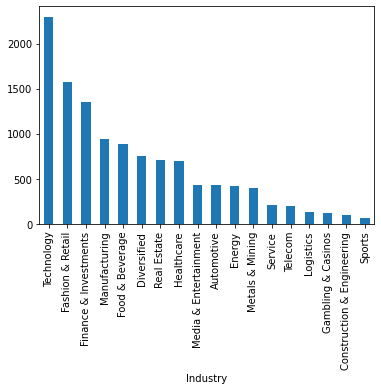

In [12]:
df.groupby('Industry')['NetWorth'].sum().sort_values(ascending=False).plot(kind='bar')